In [1]:
# import modul
import pandas as pd
import numpy as np
import re
import re as reg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dt = pd.read_excel('output_labelling.xlsx')
dt

,Review,Positif,Negatif
0,bismilah tadi sana pas masuk suru cuci tangan ...,1,0
1,walaupun ulang kali sini semenjak kecil rasa b...,1,0
2,suasanan malam hari lokawisata baturaden nih s...,1,0
3,tempat sangat bersih rapih butuh stamina utama...,1,0
4,masa lebaran tiket masuk mahal rb sangat ramai...,0,-1
...,...,...,...
284,paket komplit murah riah cocok acara keluarga,1,0
285,lokasi nyaman aman banyak tempat berswaphoto b...,1,0
286,tempat bagus sejuk mandi air dingin hangat fla...,1,0
287,view bagus tiket murah renang fre,1,0


In [3]:
dt['label'] = ''
dt

,Review,Positif,Negatif,label
0,bismilah tadi sana pas masuk suru cuci tangan ...,1,0,
1,walaupun ulang kali sini semenjak kecil rasa b...,1,0,
2,suasanan malam hari lokawisata baturaden nih s...,1,0,
3,tempat sangat bersih rapih butuh stamina utama...,1,0,
4,masa lebaran tiket masuk mahal rb sangat ramai...,0,-1,
...,...,...,...,...
284,paket komplit murah riah cocok acara keluarga,1,0,
285,lokasi nyaman aman banyak tempat berswaphoto b...,1,0,
286,tempat bagus sejuk mandi air dingin hangat fla...,1,0,
287,view bagus tiket murah renang fre,1,0,


In [4]:
#pindahkan isi label positif dan negarif ke kolom label
for i in dt.index:
    if dt.at[i,'Positif']==1:
        dt.at[i,'label']=1
    if dt.at[i,'Negatif']==-1:
        dt.at[i,'label']=-1
    if ((dt.at[i,'Negatif']==0) and (dt.at[i,'Positif']==0)):
        dt.at[i,'label']=0

In [5]:
dt

,Review,Positif,Negatif,label
0,bismilah tadi sana pas masuk suru cuci tangan ...,1,0,1
1,walaupun ulang kali sini semenjak kecil rasa b...,1,0,1
2,suasanan malam hari lokawisata baturaden nih s...,1,0,1
3,tempat sangat bersih rapih butuh stamina utama...,1,0,1
4,masa lebaran tiket masuk mahal rb sangat ramai...,0,-1,-1
...,...,...,...,...
284,paket komplit murah riah cocok acara keluarga,1,0,1
285,lokasi nyaman aman banyak tempat berswaphoto b...,1,0,1
286,tempat bagus sejuk mandi air dingin hangat fla...,1,0,1
287,view bagus tiket murah renang fre,1,0,1


In [6]:
#Drop/ hapus kolom Positif dan Kolom Negatif
dt.drop(['Positif','Negatif'], axis=1, inplace=True)

In [7]:
dt.head(10)

,Review,label
0,bismilah tadi sana pas masuk suru cuci tangan ...,1
1,walaupun ulang kali sini semenjak kecil rasa b...,1
2,suasanan malam hari lokawisata baturaden nih s...,1
3,tempat sangat bersih rapih butuh stamina utama...,1
4,masa lebaran tiket masuk mahal rb sangat ramai...,-1
5,enak buat wisata keluarga cocok suasana dingin...,0
6,lokawisata rupa suatu objek wisata letak belah...,1
7,tempat wisata cukup tarik alam bagus luas udar...,1
8,wisata pertama sat pandemi kalau mau pancur sa...,1
9,tempat sangat rekomendasi anak keluarga anak a...,1


In [8]:
#positif=dt.groupby['label'].sum()
positif=dt[dt['label'] ==1]['label'].count()
netral=dt[dt['label'] ==0]['label'].count()
negatif=dt[dt['label'] ==-1]['label'].count()
print('Label Sentimen Positif=',positif)
print('Label Sentimen Netral=',netral)
print('Label Sentimen Negatif=',negatif)
# print('Sentimen Negatif=',negatif)


Label Sentimen Positif= 250
Label Sentimen Netral= 21
Label Sentimen Negatif= 18


In [9]:
# Vektorisasi dengan TF-iDF
# Kali ini akan menggunakan library TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
objek_vektorizer= TfidfVectorizer() # Anda bisa juga menggunakan parameter max_feature
                                    # dengan menambahkan dalam kurung max_feature=3000,
                                    # artinya jika fitur yang dihasilkan lebih dari 3000
                                    # maka akan dipangkas dan hanya
                                    # 3000 fitur saja yang akan diproses.
                                    # hitung nilai-nilai bobot TF-IDF setiap fitur
vektor_dt=objek_vektorizer.fit_transform(dt['Review']).toarray()

In [10]:
print(vektor_dt)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.15457625 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [11]:
#cek jumlah fitur
jumlah_fitur=objek_vektorizer.get_feature_names()
print("Jumlah fitur kata yang dihasilkan dari proses vektorisasi :",len(jumlah_fitur))

Jumlah fitur kata yang dihasilkan dari proses vektorisasi : 1440


In [12]:
#buat objek baru objek_vektorizer_100
objek_vektorizer_100= TfidfVectorizer(max_features=100)
#proses vektorisasi
vektor_dt_100=objek_vektorizer_100.fit_transform(dt['Review']).toarray()
#mencari 100 fitur pertama
jumlah_fitur_100=objek_vektorizer_100.get_feature_names()
print("Jumlah 100 fitur kata yang dihasilkan dari proses vektorisasi :",len(jumlah_fitur_100))
print()
print()
#tampilkan 100 fitur kata pertama
print(jumlah_fitur_100)
#Tampiljkan bobot 100 fitur pertama
print("\n\n Ini 100 fitur kata:")
print(vektor_dt_100)

Jumlah 100 fitur kata yang dihasilkan dari proses vektorisasi : 100


['adem', 'air', 'alam', 'anak', 'area', 'asri', 'bagus', 'baik', 'banget', 'banyak', 'baturaden', 'bayar', 'beberapa', 'belah', 'bersih', 'buat', 'cocok', 'cukup', 'datang', 'destinasi', 'dingin', 'enak', 'fasilitas', 'foto', 'ga', 'gunung', 'harga', 'hari', 'indah', 'jadi', 'jajan', 'jalan', 'jangkau', 'jauh', 'jual', 'kaki', 'kalau', 'kalo', 'keluarga', 'kesini', 'kolam', 'kota', 'kunjung', 'lebih', 'lereng', 'letak', 'libur', 'lokasi', 'lokawisata', 'luas', 'lumayan', 'main', 'makan', 'malam', 'mandi', 'mantap', 'masuk', 'mau', 'mengunakan', 'milik', 'murah', 'naik', 'nikmat', 'nyaman', 'orang', 'panas', 'pancur', 'pandang', 'parkir', 'pas', 'purwokerto', 'ramai', 'rb', 'renang', 'rupa', 'sama', 'sana', 'sangat', 'sate', 'sedia', 'segar', 'sejuk', 'sekali', 'senang', 'sepeda', 'sini', 'slamet', 'spot', 'suasana', 'taman', 'tarik', 'tempat', 'terlalu', 'tiket', 'udara', 'unjung', 'utama', 'wahana', 'wisata', 'wisat

In [13]:
# Bagi data menjadi data training dan testing. Kita akan menggunakan hasil vektorisasi TFIDF ( semua fitur).
#Pada proses vektorisasi hasil TFIDF disimpan dalam vektor_dt
# panggil library untuk split data menjadi training dan testing
from sklearn.model_selection import train_test_split
y=dt['label']
y=y.astype('int')
Xtrain, Xtest,Ytrain, Ytest = train_test_split(vektor_dt, y, test_size=0.2, random_state=0)
vektor_dt

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15457625, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
# Panggil kelas Naive Bayes
from sklearn.naive_bayes import MultinomialNB
#buat objek dari kelas Naive Bayes
model_NBM=MultinomialNB()

In [15]:
#lakukan training
model_NBM.fit(Xtrain,Ytrain)

MultinomialNB()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
y_preds = model_NBM.predict(Xtest)
print(" TABEL CONFUSSION MATRIX")
print("==========================")
print(confusion_matrix(Ytest,y_preds, labels=[1,0,-1]))
print("                    TABEL AKURASI")
print("====================================================")
print(classification_report(Ytest,y_preds))

 TABEL CONFUSSION MATRIX
[[50  0  0]
 [ 4  0  0]
 [ 4  0  0]]
                    TABEL AKURASI
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00         4
           1       0.86      1.00      0.93        50

    accuracy                           0.86        58
   macro avg       0.29      0.33      0.31        58
weighted avg       0.74      0.86      0.80        58



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import seaborn as sns

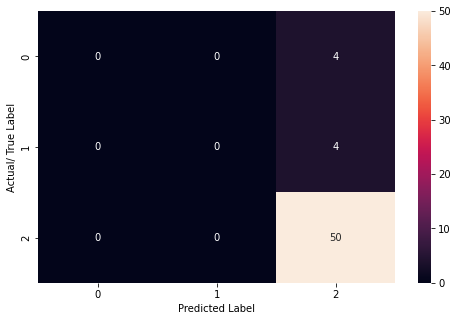

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Ytest, y_preds), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual/ True Label")
plt.show()

In [19]:
print("\nNilai Setiap Parameter Cofussion Matrix")
print("====================================================")
print('Akurasinya adalah :',accuracy_score(Ytest, y_preds))
print('Presisi Model sebesar :',precision_score(Ytest, y_preds, average=None))
print('Kemamuan recall/ sensivitas Model sebesar:',recall_score(Ytest,y_preds, average=None) )
print('Specificity Model sebesar :',recall_score(Ytest,y_preds, pos_label=0, average=None))
print('Skor F-1 dari model sebesar:',f1_score(Ytest, y_preds, average=None))



Nilai Setiap Parameter Cofussion Matrix
Akurasinya adalah : 0.8620689655172413
Presisi Model sebesar : [0.         0.         0.86206897]
Kemamuan recall/ sensivitas Model sebesar: [0. 0. 1.]
Specificity Model sebesar : [0. 0. 1.]
Skor F-1 dari model sebesar: [0.         0.         0.92592593]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


<h1>Decision Tree</h1>

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model_tree = DecisionTreeClassifier(criterion='gini')

In [26]:
model_tree.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_preds = model_tree.predict(Xtest)
print('                       Tabel Akurasi')
print('='*60)
print(classification_report(Ytest, y_preds))

                       Tabel Akurasi
              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         4
           0       0.00      0.00      0.00         4
           1       0.87      0.96      0.91        50

    accuracy                           0.84        58
   macro avg       0.62      0.40      0.44        58
weighted avg       0.82      0.84      0.82        58

